# COGS 108 - Final Project 

# Overview

* Overview *

# Names

- Sainan Chen
- Liying Gui
- Yuechen Liu
- Kunal Parulekar
- Maryam Rahdaran
- Mingshuo Yu

# Group Members IDs

- A14483750
- A14428755
- A15682187
- A
- A15714113
- A

# Research Question

After analyzing features of videos gathered through Youtube, we want to provide recommendations for companies while they seek for youtubers for commercial help and also we can help youtubers to improve their youtube channel by providing information about trendy video categories and trendy periods.

## Background and Prior Work

This data set is a collection of information about 138,000 Youtube videos that span several different categories. We know that certain videos are more or less likely to appear as “trending” on Youtube. We also know that this can seriously impact the view numbers, and so the revenue generated from these videos. We also know that advertisers want to advertise on videos that are less controversial and/or of higher quality and we believe that using the like/dislike ratio of a video is a good way to understand that metric. So far, it is difficult to find other similar projects since YouTube analytics is its own tool through YouTube. If we do find one later, we can always reference its findings compared to our own. 

References (include links):
- 1)
- 2)

# Hypothesis


The answer we are expecting is, for example, a list of popular youtubers(millions of subscribers)focusing on high tech with good response from former videos (high likes over dislikes ratio) will be recommended to company like Apple and Huawei to promote their high-tech products. 

# Dataset(s)

- Dataset Name: 
- Link to the dataset: 
https://www.kaggle.com/coffeeinspace/youtube-videos-cleaned-set
- Description: This dataset is uploaded by a private user on Kaggle, and it collects information about 138,000 Youtube videos from July 23rd 2006 to April 6th 2018. Features in the dataset include:
- Data Explaination:
Video_id: the unique id for every video on Youtube.
Trending_date: the date when the video suddenly exposed to a large population.
Title: title of the video shown on Youtube.
Channel_title: title of the video channel where the video is posted on.
Category_id: a specific id indicating the category of the video according to Youtube API video category id l
Publish_time: the date when the video is published on Youtube.
Tags: several words which the content of video may relate to.
Views: number of video viewers from the date when the video is published until the date when data is collected.
Likes: number of likes the video gets from the date when the video is published until the date when data is collected.
Dislikes: number of dislikes the video gets from the date when the video is published until the date when data is collected.
Comments: number of comments the video gets from the date when the video is published until the date when data is collected.
Thumbnail_link: link to the video thumbnail.
Comments_disabled: a boolean value. False means comment function is disabled and viewers can’t write comments under the video.
Ratings_disabled: a boolean value. False means rating function is disabled and viewers can’t rate the video.
Description: Several sentences the youtuber wrote to describe the video when he/she published the video.

# Setup

In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [3]:
youtube_df = pd.read_csv("all_videos_with_revised_dates.csv")
youtube_df = youtube_df.drop('video_id', axis = 1)
youtube_df['like_ratio'] = ((youtube_df['likes']/(youtube_df['likes']+youtube_df['dislikes']))*100)
print(youtube_df)

        country_code trending_date  \
0                  0      17.14.11   
1                  0      17.14.11   
2                  0      17.14.11   
3                  0      17.14.11   
4                  0      17.14.11   
5                  0      17.14.11   
6                  0      17.14.11   
7                  0      17.14.11   
8                  0      17.14.11   
9                  0      17.14.11   
...              ...           ...   
137578             4      18.07.04   
137579             4      18.07.04   
137580             4      18.07.04   
137581             4      18.07.04   
137582             4      18.07.04   
137583             4      18.07.04   
137584             4      18.07.04   
137585             4      18.07.04   
137586             4      18.07.04   
137587             4      18.07.04   

                                                    title  \
0              Eminem - Walk On Water (Audio) ft. Beyoncé   
1                           PLUSH - Bad U

In [4]:
print(youtube_df[youtube_df.category_id == 44].views)

52468    8804
Name: views, dtype: int64


In [ ]:
youtube_df.plot(x='views',y='like_ratio', kind='bar')

In [6]:
print(youtube_df[youtube_df.category_id == 44].dislikes)
#For some reason category 44 has no likes or dislikes so I'll remove that one.
youtube_df = youtube_df[youtube_df.category_id != 44]

52468    0
Name: dislikes, dtype: int64


In [7]:
#This is for our category analysis
category_likes_df = youtube_df[['category_id','like_ratio']].copy()
category_likes_df['count'] = category_likes_df.groupby('category_id')['category_id'].transform('count')
print(category_likes_df)
category_likes_df = category_likes_df.groupby(['category_id'])[['category_id','like_ratio','count']].mean()

        category_id  like_ratio  count
0                10       94.77  19466
1                23       98.70  11211
2                23       96.47  11211
3                24       98.52  38707
4                10       98.73  19466
5                25       95.74   9760
6                23       95.01  11211
7                22       95.10  14544
8                24       98.61  38707
9                22       80.90  14544
...             ...         ...    ...
137578           10       97.44  19466
137579           26       95.79   9010
137580           24       97.17  38707
137581           10       98.95  19466
137582           26       97.03   9010
137583           24       89.47  38707
137584           24       74.96  38707
137585            1       99.12   7671
137586           10       93.30  19466
137587           28       98.68   4134

[137587 rows x 3 columns]


In [8]:
category_likes_df

,category_id,like_ratio,count
category_id,,,
1,1,93.14,7671
2,2,93.52,1822
10,10,95.93,19466
15,15,97.00,1663
17,17,92.63,9618
19,19,94.41,871
20,20,94.79,4978
22,22,91.18,14544
23,23,95.81,11211


In [9]:
category_likes_df.columns

Index(['category_id', 'like_ratio', 'count'], dtype='object')

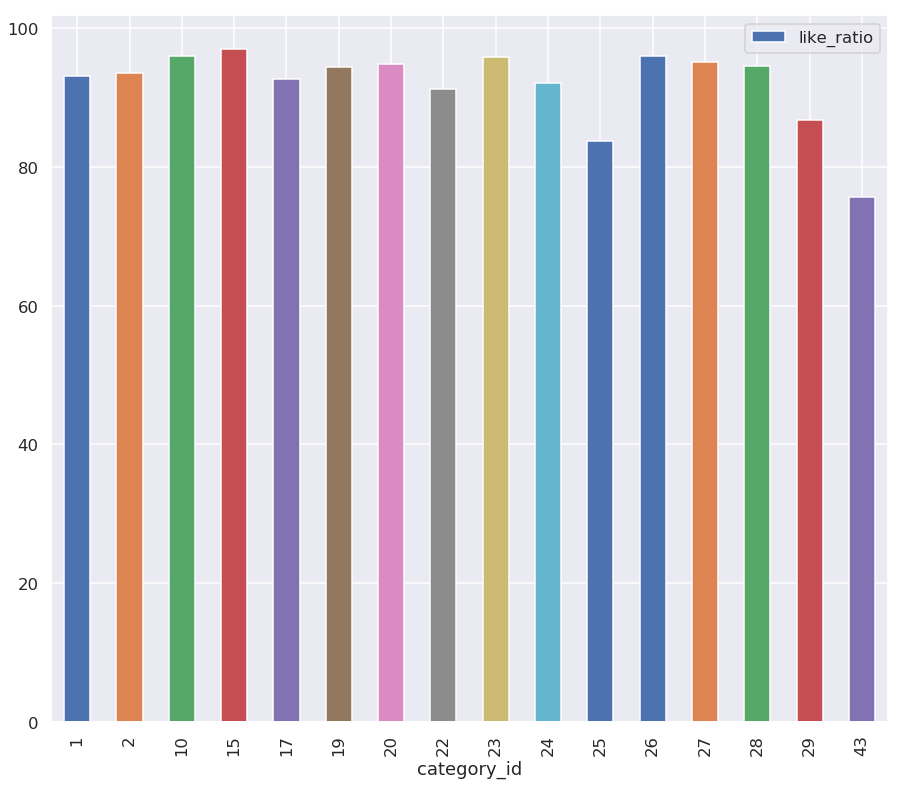

In [10]:
category_likes_df.plot.bar(x = 'category_id', y = 'like_ratio', figsize=(15,13))

In [11]:
#Here we can see there is a pretty clearly some categories are better than others at getting better
#What if we investigated time posted with views?
print(youtube_df.publish_time)

0         2017-11-10T17:00:03.000Z
1         2017-11-13T17:00:00.000Z
2         2017-11-12T19:05:24.000Z
3         2017-11-12T18:01:41.000Z
4         2017-11-09T11:04:14.000Z
5         2017-11-13T07:37:51.000Z
6         2017-11-12T23:52:13.000Z
7         2017-11-13T17:13:01.000Z
8         2017-11-12T20:19:24.000Z
9         2017-11-10T14:10:46.000Z
                    ...           
137578    2018-03-23T08:05:27.000Z
137579    2018-03-23T18:02:08.000Z
137580    2018-03-22T22:16:17.000Z
137581    2018-03-23T04:30:01.000Z
137582    2018-03-22T20:30:23.000Z
137583    2018-03-22T17:00:08.000Z
137584    2018-03-23T04:00:10.000Z
137585    2018-03-23T19:05:39.000Z
137586    2018-03-22T15:48:42.000Z
137587    2018-03-22T14:02:45.000Z
Name: publish_time, Length: 137587, dtype: object


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [12]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

Based on the Kaggle policy we complied that we use the Services for our own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party therefore we have the permission to use the data. Since the videos are public as well the dataset, we believe that there is no privacy concern we need to deal with. Since the dataset is collected by the Youtube API, we believe that the collector has minimized the bias in the dataset.


# Conclusion & Discussion

*Fill in your discussion information here*